# CS5242

## Load Data

In [1]:
from data import Data
import numpy as np

full_train = Data(data_type='train')

# idx = np.random.permutation(len(full_train.x))
# full_train_x,full_train_y = full_train.x[idx], full_train.y[idx]
full_train_x,full_train_y = full_train.x, full_train.y


del full_train

val_data_x, train_data_x = full_train_x[:full_train_x.shape[0]//5,:], full_train_x[full_train_x.shape[0]//5:,:]
val_data_y,train_data_y = full_train_y[:full_train_y.shape[0]//5,:], full_train_y[full_train_y.shape[0]//5:,:]

print("Train data: x:"+ str(train_data_x.shape)+ ' y:'+str(train_data_y.shape))
print("Validation data: x:"+ str(val_data_x.shape)+ ' y:'+str(val_data_y.shape))



Loading train data 18662/18662: 100%|█████████████████████████████████████████████████████████████ [ time left: 00:00 ]


Train data: x:(14930, 1000, 102) y:(14930, 1)
Validation data: x:(3732, 1000, 102) y:(3732, 1)


## Model

In [3]:
import tensorflow as tf
# physical_devices = tf.config.experimental.list_physical_devices('GPU')
# tf.config.experimental.set_memory_growth(physical_devices[0], True)

model_name = 'boosting_lstm_pooling_2'

def create_model(show_summary = False):
    model = tf.keras.Sequential([
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128,return_sequences=True),input_shape=(1000,102)),
        tf.keras.layers.GlobalMaxPooling1D(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(rate=0.2),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(loss='binary_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(1e-4,0.95,0.99),
                  metrics=['accuracy',tf.keras.metrics.AUC()])
    
    if show_summary:
        model.summary()
    
    return model
    
num_of_bags = 9
epochs_per_bag = 250
start_from_bag = 7


## Training with Boosting

skiping bag 0
skiping bag 1
skiping bag 2
skiping bag 3
skiping bag 4
skiping bag 5
skiping bag 6
Training bag 7
(14930, 7)
(14930,)
[0.00272739 0.02716604 0.01165894 ... 0.14107582 0.02487451 0.04852456]


Loading test data 6051/6051: 100%|████████████████████████████████████████████████████████████████ [ time left: 00:00 ]


(6051, 7)
(6051,)
Saved to result_boosting_lstm_pooling_2_boost7.csv
[0.97274901 0.9713015  0.95540943 ... 0.04031264 0.04030061 0.0402962 ]
Train on 5972 samples, validate on 3732 samples
Epoch 1/250
5972/5972 - 20s - loss: 0.5718 - accuracy: 0.6842 - auc_1: 0.7558 - val_loss: 0.5625 - val_accuracy: 0.6471 - val_auc_1: 0.9096
Epoch 2/250
5972/5972 - 18s - loss: 0.4752 - accuracy: 0.7525 - auc_1: 0.8471 - val_loss: 0.5372 - val_accuracy: 0.6428 - val_auc_1: 0.9389
Epoch 3/250
5972/5972 - 18s - loss: 0.4222 - accuracy: 0.8069 - auc_1: 0.8868 - val_loss: 0.4038 - val_accuracy: 0.8585 - val_auc_1: 0.9585
Epoch 4/250
5972/5972 - 18s - loss: 0.3895 - accuracy: 0.8245 - auc_1: 0.9030 - val_loss: 0.3208 - val_accuracy: 0.9204 - val_auc_1: 0.9659
Epoch 5/250
5972/5972 - 18s - loss: 0.3642 - accuracy: 0.8413 - auc_1: 0.9151 - val_loss: 0.2853 - val_accuracy: 0.9250 - val_auc_1: 0.9707
Epoch 6/250
5972/5972 - 18s - loss: 0.3446 - accuracy: 0.8521 - auc_1: 0.9238 - val_loss: 0.2666 - val_accuracy

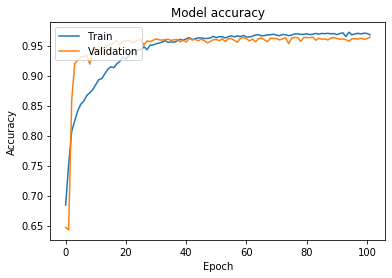

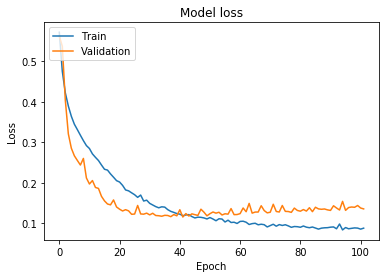

Training bag 8
(14930, 8)
(14930,)
[0.00239843 0.02430158 0.01082779 ... 0.14041573 0.02822471 0.0424974 ]


Loading test data 6051/6051: 100%|████████████████████████████████████████████████████████████████ [ time left: 00:00 ]


(6051, 8)
(6051,)
Saved to result_boosting_lstm_pooling_2_boost8.csv
[0.97559007 0.97427025 0.96030683 ... 0.03703639 0.03703525 0.03703427]
Train on 5972 samples, validate on 3732 samples
Epoch 1/250
5972/5972 - 21s - loss: 0.5737 - accuracy: 0.6857 - auc_3: 0.7584 - val_loss: 0.5273 - val_accuracy: 0.7331 - val_auc_3: 0.9108
Epoch 2/250
5972/5972 - 18s - loss: 0.4833 - accuracy: 0.7505 - auc_3: 0.8385 - val_loss: 0.4646 - val_accuracy: 0.8100 - val_auc_3: 0.9393
Epoch 3/250
5972/5972 - 18s - loss: 0.4288 - accuracy: 0.8048 - auc_3: 0.8828 - val_loss: 0.4123 - val_accuracy: 0.8676 - val_auc_3: 0.9543
Epoch 4/250
5972/5972 - 18s - loss: 0.3936 - accuracy: 0.8235 - auc_3: 0.9013 - val_loss: 0.3631 - val_accuracy: 0.9017 - val_auc_3: 0.9619
Epoch 5/250
5972/5972 - 18s - loss: 0.3665 - accuracy: 0.8399 - auc_3: 0.9149 - val_loss: 0.3173 - val_accuracy: 0.9145 - val_auc_3: 0.9676
Epoch 6/250
5972/5972 - 18s - loss: 0.3498 - accuracy: 0.8449 - auc_3: 0.9210 - val_loss: 0.2662 - val_accuracy

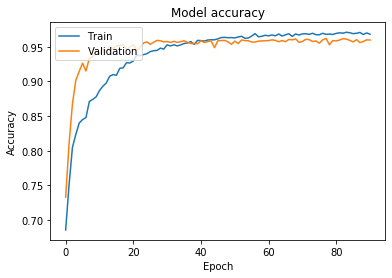

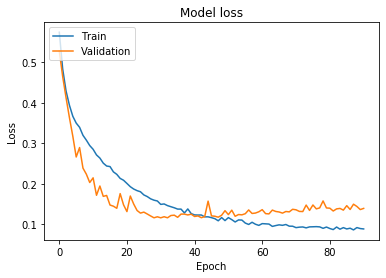

Training bag 9


In [ ]:
import os
import matplotlib.pyplot as plt
import csv
import math
from data import Data

%matplotlib inline
    
training_loss = np.ones(train_data_x.shape[0])

for bag in range(num_of_bags):
    # skip training
    if bag < start_from_bag:
        print("skiping bag "+str(bag))
        continue
    print("Training bag "+str(bag))

    # Put data into bags
    model = create_model(False)
    train_size = train_data_x.shape[0]//10*4
    if bag != 0 :
        # Check prediction for training data
        for validate_bag in range(bag):
            checkpoint_dir = './checkpoints/' + model_name+ '_bag'+ str(validate_bag)
            model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))
            if validate_bag == 0:
                predictions = model.predict(train_data_x)
            else:
                predictions = np.concatenate((predictions,model.predict(train_data_x)),axis=1)
        print(predictions.shape)

        avg_predictions = np.mean(predictions, axis=1)
        print(avg_predictions.shape)
        
        # Select training data poorly predicted 
        training_loss = avg_predictions-np.reshape(train_data_y,(train_data_y.shape[0]))
        training_loss = np.absolute(training_loss)
        print(training_loss)
        
        # Save Predictions for test data
        test_data = Data(data_type='test')
        for validate_bag in range(bag):
            checkpoint_dir = './checkpoints/' + model_name+ '_bag'+ str(validate_bag)
            model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))
            if validate_bag == 0:
                predictions = model.predict(test_data.x)
            else:
                predictions = np.concatenate((predictions,model.predict(test_data.x)),axis=1)
        print(predictions.shape)

        avg_predictions = np.mean(predictions, axis=1)
        print(avg_predictions.shape)
        
        output_file = 'result_' + model_name +'_boost'+ str(bag) +'.csv'
        with open(output_file, 'wt', newline='', encoding='utf-8') as output_file:
            csv_writer = csv.writer(output_file)
            csv_writer.writerow(('Id', 'Predicted'))
            for id, predict in enumerate(avg_predictions):
                csv_writer.writerow((id, predict))
        print('Saved to '+'result_' + model_name +'_boost'+ str(bag) +'.csv')
        # Free memory space for test data
        del test_data
        
        
    
    idx = (-training_loss).argsort()[:train_size]
    print(training_loss[idx])
    bag_x,bag_y = train_data_x[idx], train_data_y[idx]
        
    del model
        
    ## TODO define different models if possible
    model = create_model(bag==0)
    # Directory where the checkpoints will be saved
    checkpoint_dir = './checkpoints/' + model_name+ '_bag'+ str(bag)
    # Name of the checkpoint files
    checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

    checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
        filepath=checkpoint_prefix,
        monitor='val_loss',
        save_best_only=True,
        save_weights_only=True)

    early_stopping_callback = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss', 
        min_delta=0, 
        patience=60, 
        mode='auto', 
        restore_best_weights=True)
        
        
        
    history = model.fit(x=bag_x,y=bag_y, validation_data=(val_data_x,val_data_y), epochs=epochs_per_bag,batch_size=32,
                    callbacks=[checkpoint_callback,early_stopping_callback], verbose=2,shuffle=True)
    
    print()
    
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
    
    del model,history,bag_x,bag_y
    

## Restore Weights

In [4]:
checkpoint_dir = './checkpoints/' + model_name
model = create_model()

import numpy as np
from data import Data

test_data = Data(data_type='test')
print("Test data: x:"+ str(test_data.x.shape)+ ' y:'+str(test_data.y.shape))

for bag in range(num_of_bags):
    checkpoint_dir = './checkpoints/' + model_name+ '_bag'+ str(bag)
    model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))
    if bag == 0:
        predictions = model.predict(test_data.x)
    else:
        predictions = np.concatenate((predictions,model.predict(test_data.x)),axis=1)
print(predictions.shape)

avg_predictions = np.mean(predictions, axis=1)
print(avg_predictions.shape)

Loading test data 6051/6051: 100%|████████████████████████████████████████████████████████████████ [ time left: 00:00 ]


Test data: x:(6051, 1000, 102) y:(6051, 1)
(6051, 9)
(6051,)




## Save Prediction to CSV

In [5]:
import csv

output_file = 'result_' + model_name + '.csv'
with open(output_file, 'wt', newline='', encoding='utf-8') as output_file:
    csv_writer = csv.writer(output_file)
    csv_writer.writerow(('Id', 'Predicted'))
    for id, predict in enumerate(avg_predictions):
        csv_writer.writerow((id, predict))
print('Saved to '+'result_' + model_name + '.csv')

Saved to result_boosting_lstm_pooling_2.csv
